<a href="https://colab.research.google.com/github/DangTrungNhut/BaiTap2_AI_electric-cooker/blob/main/AI_BT2_24_2_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


52.34639955317768


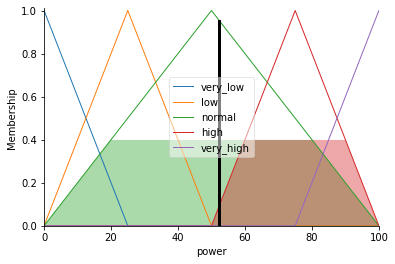

In [7]:
#electric cooker 24_02_2023

#import library
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10, 181, 1), 'time')
rice = ctrl.Antecedent(np.arange(100, 1001, 1), 'rice')
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')

time['very_fast'] = fuzz.trimf(time.universe, [10, 10, 35])
time['fast'] = fuzz.trimf(time.universe, [10, 35, 85])
time['normal'] = fuzz.trimf(time.universe, [10, 85, 180])
time['slow'] = fuzz.trimf(time.universe, [85, 135, 180])
time['very_slow'] = fuzz.trimf(time.universe, [135, 180, 180])

rice['very_little'] = fuzz.trimf(rice.universe, [100, 100, 200])
rice['little'] = fuzz.trimf(rice.universe, [100, 150, 300])
rice['average'] = fuzz.trimf(rice.universe, [120, 300, 500])
rice['much'] = fuzz.trimf(rice.universe, [150, 600, 1000])
rice['very_much'] = fuzz.trimf(rice.universe, [400, 750, 1000])

power['very_low'] = fuzz.trimf(power.universe, [0, 0, 25])
power['low'] = fuzz.trimf(power.universe, [0, 25, 50])
power['normal'] = fuzz.trimf(power.universe, [0, 50, 100])
power['high'] = fuzz.trimf(power.universe, [50, 75, 100])
power['very_high'] = fuzz.trimf(power.universe, [75, 100, 100])

#Show
#time.view()
#rice.view()
#power.view()

rule1 = ctrl.Rule(time['very_fast'] & rice['very_little'], power['normal'])
rule2 = ctrl.Rule(time['very_fast'] & rice['little'], power['normal'])
rule3 = ctrl.Rule(time['very_fast'] & rice['average'], power['normal'])
rule4 = ctrl.Rule(time['very_fast'] & rice['much'], power['high'])
rule5 = ctrl.Rule(time['very_fast'] & rice['very_much'], power['very_high'])
rule6 = ctrl.Rule(time['fast'] & rice['very_little'], power['normal'])
rule7 = ctrl.Rule(time['fast'] & rice['little'], power['normal'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['normal'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule10 = ctrl.Rule(time['fast'] & rice['very_much'], power['very_high'])
rule11 = ctrl.Rule(time['normal'] & rice['very_little'], power['normal'])
rule12 = ctrl.Rule(time['normal'] & rice['little'], power['normal'])
rule13 = ctrl.Rule(time['normal'] & rice['average'], power['normal'])
rule14 = ctrl.Rule(time['normal'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['normal'] & rice['very_much'], power['high'])
rule16 = ctrl.Rule(time['slow'] & rice['very_little'], power['very_low'])
rule17 = ctrl.Rule(time['slow'] & rice['little'], power['low'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['low'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['normal'])
rule20 = ctrl.Rule(time['slow'] & rice['very_much'], power['normal'])
rule21 = ctrl.Rule(time['very_slow'] & rice['very_little'], power['very_low'])
rule22 = ctrl.Rule(time['very_slow'] & rice['little'], power['low'])
rule23 = ctrl.Rule(time['very_slow'] & rice['average'], power['normal'])
rule24 = ctrl.Rule(time['very_slow'] & rice['much'], power['normal'])
rule25 = ctrl.Rule(time['very_slow'] & rice['very_much'], power['normal'])

powering_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15,
                                   rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])   #thu thap data

powering = ctrl.ControlSystemSimulation(powering_ctrl)  #teach

#Input
powering.input['time'] = 121.75
powering.input['rice'] = 900.3

#Output
powering.compute()
print(powering.output['power'])
power.view(sim = powering)
